In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [103]:
df = pd.read_csv('F:\project dataset\Timeshifted.csv')

In [104]:
y = df[df.columns[3:5]] 

In [105]:
y.head()

,PM25,PM10
0,96,140
1,96,140
2,96,140
3,96,140
4,84,119


In [106]:
X = df.drop(['PM25', 'PM10', 'Temp' , 'RH'], axis = 1) 

In [107]:
X.head()

,Month,Hour,Minute,PM25_1,PM10_1,Temp_1,RH_1,PM25_2,PM10_2,Temp_2,RH_2,PM25_3,PM10_3,Temp_3,RH_3,PM25_4,PM10_4,Temp_4,RH_4
0,1,1,0,59,109,22.7,76.0,59,109,25.9,75.0,59,109,28.6,74.0,59,109,28.8,71.0
1,1,1,15,96,140,22.6,77.0,59,109,22.7,76.0,59,109,25.9,75.0,59,109,28.6,74.0
2,1,1,30,96,140,23.3,78.0,96,140,22.6,77.0,59,109,22.7,76.0,59,109,25.9,75.0
3,1,1,45,96,140,23.5,78.0,96,140,23.3,78.0,96,140,22.6,77.0,59,109,22.7,76.0
4,1,2,0,96,140,23.6,79.0,96,140,23.5,78.0,96,140,23.3,78.0,96,140,22.6,77.0


In [108]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1234)

In [109]:
X_train.shape, y_train.shape

((68458, 19), (68458, 2))

In [110]:
X_test.shape, y_test.shape

((29340, 19), (29340, 2))

In [111]:
X.columns

Index(['Month', 'Hour', 'Minute', 'PM25_1', 'PM10_1', 'Temp_1', 'RH_1',
       'PM25_2', 'PM10_2', 'Temp_2', 'RH_2', 'PM25_3', 'PM10_3', 'Temp_3',
       'RH_3', 'PM25_4', 'PM10_4', 'Temp_4', 'RH_4'],
      dtype='object')

Linear Regression

In [112]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create linear regression object
regr = LinearRegression()

In [113]:
# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [114]:
# Make predictions using the testing set
lin_pred = regr.predict(X_test)

In [115]:
linear_regression_score = regr.score(X_test, y_test)
linear_regression_score

0.9415958424666652

In [116]:
from math import sqrt
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, lin_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, lin_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, lin_pred))

Coefficients: 
 [[-9.64388804e-02  4.77661696e-03 -3.41963184e-03  9.66812871e-01
   2.59392519e-03  1.10181212e-02 -3.40292685e-02  1.89506503e-03
  -1.70964291e-03  9.24659649e-03  7.68844115e-02 -1.48200656e-03
   4.48584460e-03 -1.38961819e-01 -4.51254284e-02 -1.40481250e-02
  -7.37324687e-03  1.42880108e-01 -2.14073092e-02]
 [-1.38690243e-01 -4.10671808e-03 -2.88910678e-03 -3.02840851e-04
   9.73335460e-01 -6.25141486e-02 -2.62611761e-02 -4.21629497e-03
   5.91131257e-03  3.52784058e-02  6.18025055e-02  3.83191212e-03
  -5.04983348e-03  2.11765545e-02 -6.88624547e-02 -4.75694627e-03
  -2.50422588e-02 -4.30725349e-02  1.57851363e-02]]
Root mean squared error: 10.11
Mean absolute error: 3.64
R-squared: 0.94


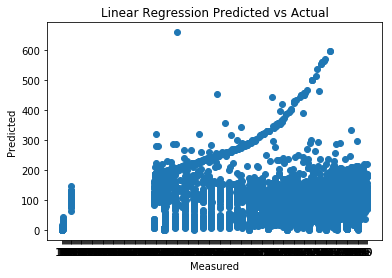

In [117]:
plt.scatter(y_test, lin_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Linear Regression Predicted vs Actual')
plt.show()

In [118]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create MLPRegressor object
mlp = MLPRegressor()

In [119]:


# Train the model using the training sets
mlp.fit(X_train, y_train)



MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [120]:


# Score the model
neural_network_regression_score = mlp.score(X_test, y_test)
neural_network_regression_score



0.9439865176652844

In [121]:
# Make predictions using the testing set
nnr_pred = mlp.predict(X_test)

In [122]:
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, nnr_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, nnr_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, nnr_pred))

Root mean squared error: 9.90
Mean absolute error: 3.64
R-squared: 0.94


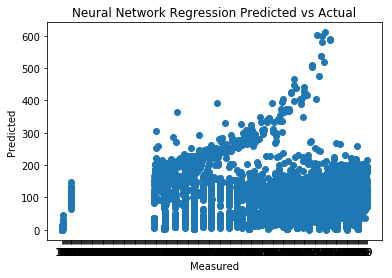

In [123]:
plt.scatter(y_test, nnr_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Neural Network Regression Predicted vs Actual')
plt.show()



In [124]:
print(nnr_pred )


[[111.94828841  43.21483359]
 [  9.30755552  36.22043763]
 [ 57.31651467 146.69415717]
 ...
 [  3.09488179  16.15977389]
 [ 36.17786954  74.08886526]
 [ 54.1367807  101.23813415]]


In [125]:
zip(*nnr_pred)


In [126]:
print(y_test)

       PM25  PM10
71943   114    45
18654     9    37
34151    59   150
74827    70    41
55047    17    56
59184    54    86
8117     45    89
34385    41   130
90924    57    28
38428    15    45
50076     8    28
91664   195    51
25191    10    19
73967    78    30
27751     9    24
45259    12    23
88245    38    17
91858    37    18
92688    45    27
64046    70   131
2645     19    32
34363    45   118
7382     53   131
12321    47    74
68295    96    44
65068    38    57
7233     40    92
47542    18    50
1962     65   136
35238    43    77
...     ...   ...
51200     9    18
91459    27    16
26524    71   158
6902     55   130
50711     6    26
1995     91   118
49070     4    33
62992    26    71
86245   135    27
21604    10    30
79133    92    33
4903     50   120
41786    48   121
83419    35     9
50505    15    39
54951    17    48
36815    48    75
53512     8    22
50353    11    25
39679    34    86
52889    19    58
27859    60   136
84824    92    17
77223   12

In [127]:
from sklearn.linear_model import Lasso

lasso = Lasso()

In [128]:
lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [129]:
# Score the model
lasso_score = lasso.score(X_test, y_test)
lasso_score

0.9416176031946343

In [130]:
# Make predictions using the testing set
lasso_pred = lasso.predict(X_test)

In [131]:
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, lasso_pred)))

Root mean squared error: 10.11


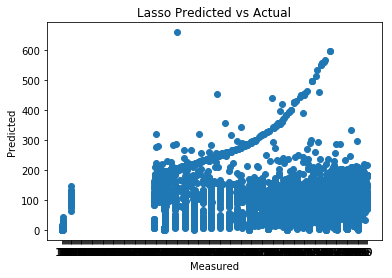

In [132]:
plt.scatter(y_test, lasso_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Lasso Predicted vs Actual')
plt.show()

In [133]:
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet()

In [134]:
elasticnet.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [135]:
elasticnet_score = elasticnet.score(X_test, y_test)
elasticnet_score

0.9416257121376606

In [136]:
elasticnet_pred = elasticnet.predict(X_test)

In [137]:
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, elasticnet_pred)))

Root mean squared error: 10.11


In [138]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Create Random Forrest Regressor object
regr_rf = RandomForestRegressor(n_estimators=200, random_state=1234)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [139]:
# Train the model using the training sets
regr_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=1234, verbose=0, warm_start=False)

In [140]:
# Score the model
decision_forest_score = regr_rf.score(X_test, y_test)
decision_forest_score

0.9411053021485662

In [141]:
# Make predictions using the testing set
regr_rf_pred = regr_rf.predict(X_test)

In [142]:
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, regr_rf_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, regr_rf_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, regr_rf_pred))

Root mean squared error: 10.15
Mean absolute error: 3.66
R-squared: 0.94


In [143]:
X.columns

Index(['Month', 'Hour', 'Minute', 'PM25_1', 'PM10_1', 'Temp_1', 'RH_1',
       'PM25_2', 'PM10_2', 'Temp_2', 'RH_2', 'PM25_3', 'PM10_3', 'Temp_3',
       'RH_3', 'PM25_4', 'PM10_4', 'Temp_4', 'RH_4'],
      dtype='object')

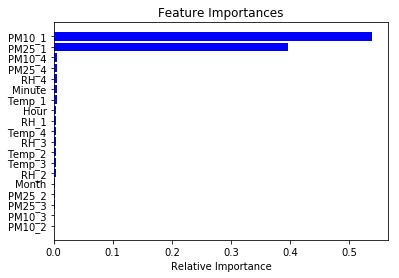

In [144]:
features = X.columns
importances = regr_rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

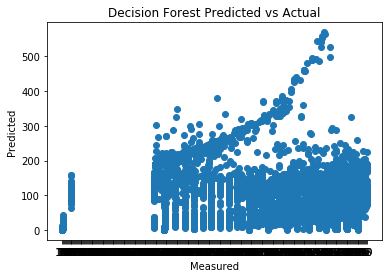

In [145]:
plt.scatter(y_test, regr_rf_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Decision Forest Predicted vs Actual')
plt.show()

In [146]:
from sklearn.ensemble import ExtraTreesRegressor

extra_tree = ExtraTreesRegressor(n_estimators=200, random_state=1234)

In [147]:
extra_tree.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
          oob_score=False, random_state=1234, verbose=0, warm_start=False)

In [148]:
extratree_score = extra_tree.score(X_test, y_test)
extratree_score

0.9400783162736022

In [149]:
extratree_pred = extra_tree.predict(X_test)

In [150]:
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, extratree_pred)))

Root mean squared error: 10.24


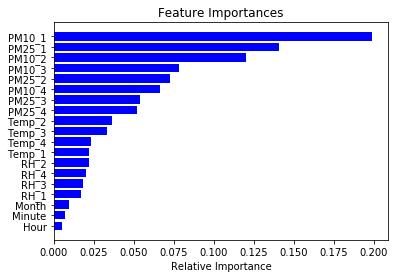

In [151]:
features = X.columns
importances = extra_tree.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

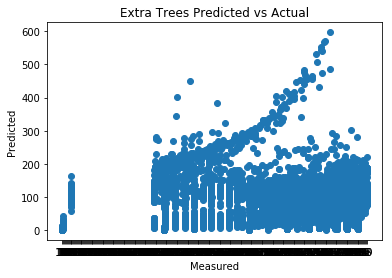

In [152]:
plt.scatter(y_test, extratree_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Extra Trees Predicted vs Actual')
plt.show()

In [155]:
print("Scores:")
print("Linear regression score: ", linear_regression_score)
print("Neural network regression score: ", neural_network_regression_score)
print("Lasso regression score: ", lasso_score)
print("ElasticNet regression score: ", elasticnet_score)
print("Decision forest score: ", decision_forest_score)
print("Extra Trees score: ", extratree_score)
print("\n")
print("RMSE:")
print("Linear regression RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, lin_pred)))
print("Neural network RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, nnr_pred)))
print("Lasso RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, lasso_pred)))
print("ElasticNet RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, elasticnet_pred)))
print("Decision forest RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, regr_rf_pred)))
print("Extra Trees RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, extratree_pred)))


Scores:
Linear regression score:  0.9415958424666652
Neural network regression score:  0.9439865176652844
Lasso regression score:  0.9416176031946343
ElasticNet regression score:  0.9416257121376606
Decision forest score:  0.9411053021485662
Extra Trees score:  0.9400783162736022


RMSE:
Linear regression RMSE: 10.11
Neural network RMSE: 9.90
Lasso RMSE: 10.11
ElasticNet RMSE: 10.11
Decision forest RMSE: 10.15
Extra Trees RMSE: 10.24
